# TP Pokemon : Seconde partie (Analyse)

### Modules necessaires :
*   PANDAS 0.24.2   => Permet la manipulation et l'analyse de données
*   NUMPY 1.16.3    => Permet la manipulation de tableaux et matrices
*   MATPLOTLIB 3.0.3
*   SEABORN 0.9.0


# Ce que nous allons découvrir et les prérequis
Dans la première partie du TP Pokémon, nous avons constitué un jeu d'observations qui va nous permettre d'entamer la démarche d'analyse et de recherche de solution à notre problème, à savoir déterminer le Pokémon à utiliser lors d'un combat dans le but de le gagner.

Nous allons commencer cette deuxième partie du TP par un peu de statistiques pour une meilleure compréhension des données. 

## Reprendre l'essentiel du code de la première partie du TP

#### - Importer `pandas`
#### - Désactiver le nombre maximum de colonnes à afficher d'un `DataFrame` (mettre l'option `display.max_columns` à `None`)
#### - Reprendre l'essentiel du code de la première partie du TP 

`#Reprise du code de la première partie
nosPokemons = pnd.read_csv("datas/pokedex.csv", engine="python")
nosPokemons['LEGENDAIRE'] = (nosPokemons['LEGENDAIRE']=='VRAI').astype(int)
nosPokemons['NOM'][62] = "Colosinge"
combats = pnd.read_csv("datas/combats.csv")
nbFoisPremierePosition = combats.groupby('First_pokemon').count()
nbFoisSecondePosition = combats.groupby('Second_pokemon').count()
nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
nombreDeVictoires = combats.groupby('Winner').count()
listeAAgreger = combats.groupby('Winner').count()
listeAAgreger.sort_index()
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.First_pokemon
listeAAgreger['POURCENTAGE_DE_VICTOIRES']= nombreDeVictoires.First_pokemon/(nbFoisPremierePosition.Winner + nbFoisSecondePosition.Winner)
nouveauPokedex = nosPokemons.merge(listeAAgreger, left_on='NUMERO', right_index = True, how='left')`

#### - Afficher `nouveauPokedex`

In [59]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [60]:
#Reprise du code de la première partie
Pokemons = pd.read_csv("datas/pokedex.csv")
Pokemons['LEGENDAIRE'] = (Pokemons['LEGENDAIRE']=='VRAI').astype(int)
Pokemons['NOM'][62] = "Colosinge"
Pokemons

<ipython-input-60-4d39c28936c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pokemons['NOM'][62] = "Colosinge"


,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0
4,5,Salam�che,Feu,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,F�e,50,100,150,100,150,50,6,1
796,797,Mega Diancie,Roche,F�e,50,160,110,160,110,110,6,1
797,798,Hoopa confin�,Psy,Spectre,80,110,60,150,130,70,6,1
798,799,Hoopa non li�,Psy,Obscur,80,160,60,170,130,80,6,1


In [61]:
combats=pd.read_csv('datas/combats.csv')
combats

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


In [62]:
nbFirstPosition = combats.groupby('First_pokemon').count()
nbSecondPosition = combats.groupby('Second_pokemon').count()
nbTotalCombats = nbFirstPosition + nbSecondPosition

In [63]:
nbTotalCombats = nbFirstPosition + nbSecondPosition
nbWinner = combats.groupby('Winner').count()

In [64]:
listeAAgreger = combats.groupby('Winner').count()
listeAAgreger.sort_index()
listeAAgreger['NBR_COMBATS'] = nbFirstPosition.Winner + nbSecondPosition.Winner
listeAAgreger['NBR_VICTOIRES'] = nbWinner.First_pokemon
listeAAgreger['POURCENTAGE_DE_VICTOIRES']= nbWinner.First_pokemon/(nbFirstPosition.Winner + nbSecondPosition.Winner)
newPokedex = Pokemons.merge(listeAAgreger, left_on='NUMERO', right_index = True, how='left')

In [65]:
newPokedex

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,First_pokemon,Second_pokemon,NBR_COMBATS,NBR_VICTOIRES,POURCENTAGE_DE_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,5,Salam�che,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,F�e,50,100,150,100,150,50,6,1,39.0,39.0,105.0,39.0,0.371429
796,797,Mega Diancie,Roche,F�e,50,160,110,160,110,110,6,1,116.0,116.0,131.0,116.0,0.885496
797,798,Hoopa confin�,Psy,Spectre,80,110,60,150,130,70,6,1,60.0,60.0,119.0,60.0,0.504202
798,799,Hoopa non li�,Psy,Obscur,80,160,60,170,130,80,6,1,89.0,89.0,144.0,89.0,0.618056


## Un peu de statistiques

Nous allons faire dans cette section un peu de statistiques sur notre jeu d'observations. 

### Description de notre jeu d'observations 

#### -  Faire dégager les caractéristiques intéressantes à l'aide de la fonction `describe()` du module `Pandas`, en se basant sur:  

- Le nombre de données (count)
- La moyenne (mean)
- L'écart type (Std pour Standard Deviation)
- Les valeurs minimales et maximales
- Les quartiles

#### - Quels sont les types de Pokémons qu'un dresseur doit posséder?

Afin de maximiser les chances de gagner, il faut que le dresseur de Pokémons dispose des principaux Pokémons du Pokédex dans sa collection. En ayant les Pokémons les plus fréquemment rencontrés, cela signifie que les adversaires ont de grandes chances de posséder les mêmes. Sachant que deux Pokémons de même type peuvent contrer les attaques, cela peut donc éviter de perdre le combat. 

- Tracer deux graphiques qui nous permettra de visualiser le nombre des pokémons en fonction de leur type (`TYPE_1` et `TYPE_2`). Cela nous aidera à identifier les Pokémons indispensables à tout dresseur. 

>Importer `matplotlib` et `seaborn`, nécessaires à la représentation graphique des données.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

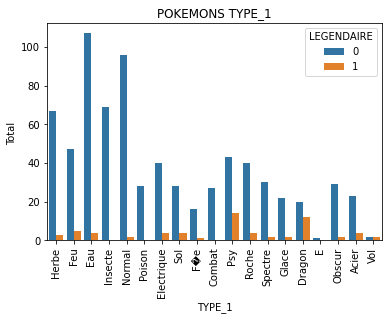

In [68]:
#Visualisation Pokemons type 1
axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=newPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_1')
plt.ylabel('Total ')
plt.title("POKEMONS TYPE_1")
plt.show()

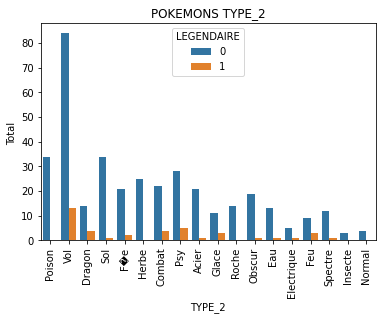

In [69]:
#Visualisation Pokemons type 2
axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=newPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_2')
plt.ylabel('Total ')
plt.title("POKEMONS TYPE_2")
plt.show()


## Les types de Pokémons gagnants et perdants

Il est important de connaître les types de Pokémons gagnants. En effet, en s'assurant de les avoir dans sa collection et de les utiliser dans les combats, le dresseur a de fortes chances de gagner.

#### - Calculer la moyenne des pourcentages de victoires de chaque Pokémon. Grouper cette moyenne par type de Pokémon et la trier par ordre croissant.

#### -  Qu'est ce qu'on peut déduire sur les Pokémons gagants?

#### - Quels sont les types de Pokémons qui perdent le plus souvent leur combat? 

#### - Peut-on déjà en déduire quelque chose? 

#### - Trouver une corrélation entre les données
- Quelles sont les features qui ont un impact sur le fait de gagner ou non un combat? Quelles sont celles qui n'ont pas pas d'impact? (Il s'agit de déterminer l'existence de features ayant un lien fort avec la capacité à gagner un combat)
    
- Utiliser un graphique (appelé `HeatMap`) pour visualiser la corrélation entre les féatures:
    * 1) Calcul de la corrélation des différentes features
    * 2) Création du graphique à partir de la corrélation calculée


#### - D'après le graphique (`HeatMap`), qu'est-ce qu'on peut constater concernant la feature `TYPE_1`? 

#### - Comment lire ce graphique?

#### - Comment interpréter la valeur 1?

#### - Que peut-on constater concernant le pourcentage des victoires? Que peut-on déduire?

#### - Que peut-on constater concernant l'impact que peut avoir la feature `LEGENDAIRE` sur la possibilité de gagner un combat?  


In [70]:
#Heatmap
import seaborn as sns

In [75]:
pokeheat = newPokedex[['TYPE_1','POINTS_DE_VIE','POINTS_ATTAQUE','POINTS_DEFFENCE','POINTS_ATTAQUE_SPECIALE','POINT_DEFENSE_SPECIALE','POINTS_VITESSE','NOMBRE_GENERATIONS','LEGENDAIRE','POURCENTAGE_DE_VICTOIRES']]
pokeheat = pd.get_dummies(pokeheat)
pokeheat

,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,POURCENTAGE_DE_VICTOIRES,TYPE_1_Acier,TYPE_1_Combat,TYPE_1_Dragon,TYPE_1_E,TYPE_1_Eau,TYPE_1_Electrique,TYPE_1_Feu,TYPE_1_F�e,TYPE_1_Glace,TYPE_1_Herbe,TYPE_1_Insecte,TYPE_1_Normal,TYPE_1_Obscur,TYPE_1_Poison,TYPE_1_Psy,TYPE_1_Roche,TYPE_1_Sol,TYPE_1_Spectre,TYPE_1_Vol
0,45,49,49,65,65,45,1,0,0.278195,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,60,62,63,80,80,60,1,0,0.380165,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,80,82,83,100,100,80,1,0,0.674242,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,80,100,123,122,120,80,1,0,0.560000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,39,52,43,60,50,65,1,0,0.491071,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,6,1,0.371429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
796,50,160,110,160,110,110,6,1,0.885496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
797,80,110,60,150,130,70,6,1,0.504202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
798,80,160,60,170,130,80,6,1,0.618056,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

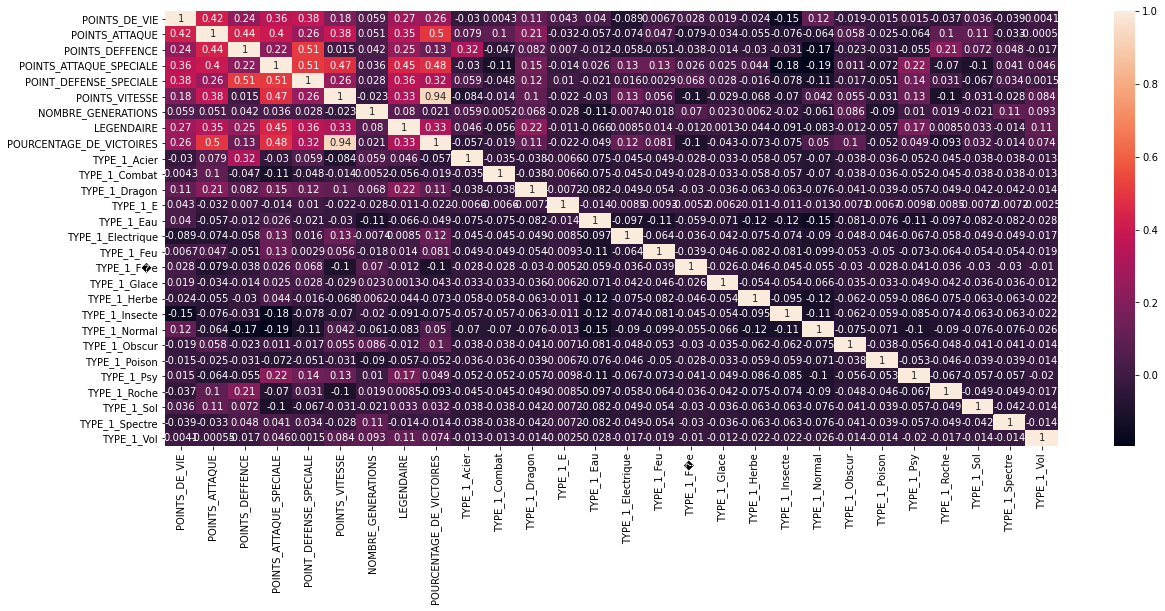

In [76]:
plt.figure(figsize = (20, 8))
sns.heatmap(pokeheat.corr(), annot = True)

# Phase d'apprentissage

Le problème que nous devons résoudre consiste à déterminer si lors d'un combat, un Pokémon a de grandes chances de gagner, nous devons donc prédire le pourcentage de victoire. C'est une valeur et nous utiliserons naturellement les algorithmes de régression, à savoir :

- La régression linéaire
- Les arbres de décisions 
- Les forêts aléatoires

#### - Découper les observations en jeu d'apprentissage et jeu de tests

In [56]:
#Save Pokedex
dataset = newPokedex
dataset.to_csv("datas/dataset.csv", sep='\t')